# CIFAR-10 IMAGE CLASSIFICATION WITH KERAS and TENSORFLOW 2.0
---

### TASK #1: UNDERSTAND THE PROBLEM STATEMENT  

CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:
- __0__ : Airplanes
- __1__ : Cars
- __2__ : Birds
- __3__ : Cats
- __4__ : Deer
- __5__ : Dogs
- __6__ : Frogs
- __7__ : Horse
- __8__ : Ships
- __9__ : Truck

The dataset stands for the __Canadian Institue For Advanced Research(CIFAR). The dataset consist of 60,000 32x32 color images and 6,000 images of each class. Images have low resolution (32x32).

__Data Source:__ https://www.cs.toronto.edu/~kriz/cifar.html

### TASK #2: IMPORT LIBRARIES AND DATASET

In [1]:
import numpy as np # for numerical analysis
import datetime
import tensorflow as tf # google's framework to build train and deploy ml and deeplearning scale

import pandas as pd # used for data manipulation
import matplotlib.pyplot as plt # for data visualation
import seaborn as sns # for data visualation
import random # to generate random numbers

In [2]:
# run the following jupyter themes only if you will run this in a dark theme jupyter notebook

#from jupyterthemes import jtplot
#jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [3]:
# Import Cifar-10 dataset
# Let's use tensorflow and keras to load our data sets for us.

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# X_train refers to input, y_train refers to output
# X_test and y_test are input and output respectively but for testing dataset.


- **Check out the sizes of both training and testing datasets**

In [4]:
print('X_train size is:', X_train.shape)
print('y_train size is:', y_train.shape)
print('X_test size is:', X_test.shape)
print('y_test size is:', y_test.shape)

X_train size is: (50000, 32, 32, 3)
y_train size is: (50000, 1)
X_test size is: (10000, 32, 32, 3)
y_test size is: (10000, 1)


__For the X_train_size__:  
What we can notice here is we have 50,000 images
and each image is basically a colored scale image.
And they are 32 pixels which by 32 pixels.
So that's the length and the width. and then there is number
three here. Number three indicates that this is simply
a color scale image. We represent a color scale
image with three channels.  
These are *Rgb*, *red*, *green* and *blue* and that's what
we're getting here simply.


__For the y_train_size__:  
Here wehave 50,000 by one. This makes sense because these
are the labels. So we have 50,000 labels corresponding to the
50,000 images that we have here in our training data.

__For the X_test_size__:  
Here we have 10,000 images and each image is 32 pixels
by 32 pixels by three.

__For the y_test_size__:  
Here we have 10,000 by one indicating that we have 10,000 classes.
Of course this data makes sense.
Now we have 50,000 dedicated for training and 10,000 dedicated
for testing. 

**Note:**  
There is a difference between the training set and the testing dataset.
We generally use the training set to train our model and then
once the model is trained we take that trained model and then
assess its performance in an unbiased scenario. Meaning we wanted to see how that model will perform
on a brand new data set that the model has never seen
before during training. 

The testing data sets or what we call it, the hold-out dataset.
They belong to the same classes as the training data
but the model has never seen this testing datasets before.

### TASK #3: PERFORM DATA VISUALIZATION

label = [3]


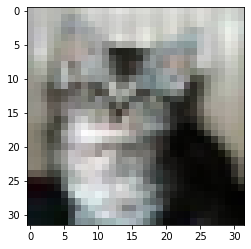

In [5]:
# Select a sample training image and visualize it
# Let's use randint from random package here
# Generate random integers between 0 and 50,000 - the size of our training dataset
# Then show that image
# Show corresponding label associated to that image (sanity check)

i = random.randint(1, len(X_train)) # generate random number between 1 and the length of our X_train

# use matplotlib to show the image
plt.imshow(X_train[i]) # i is our random number

# show the label corresponding to it
print('label = {}'.format(y_train[i]))

Our image above has a label corresponding to label 1. The image is of low resolution which may be a challenge when we train our model. But if we check our classes above, we'll see that the image looks like a white car.

Take note that this image may change everytime we run the code block above for random number.

label = [7]


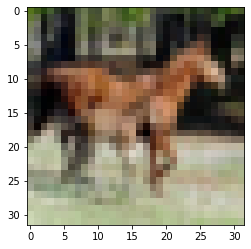

In [6]:
# Select a sample testing image and visualize it
i = random.randint(1, len(X_test))
plt.imshow(X_test[i])
print('label = {}'.format(y_test[i]))

The image we generated above is label 9. Which according to our classes, it's a truck.

So instead of doing this multiple times and run the cell multiple times,
let's use a *for loop*. Let's also create a grid.
Basically we're going to plot a 6x6 grid like 36 images
in one shot.
And every time we plot or visualize the actual
image, we also visualize the label associated
with it.

C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


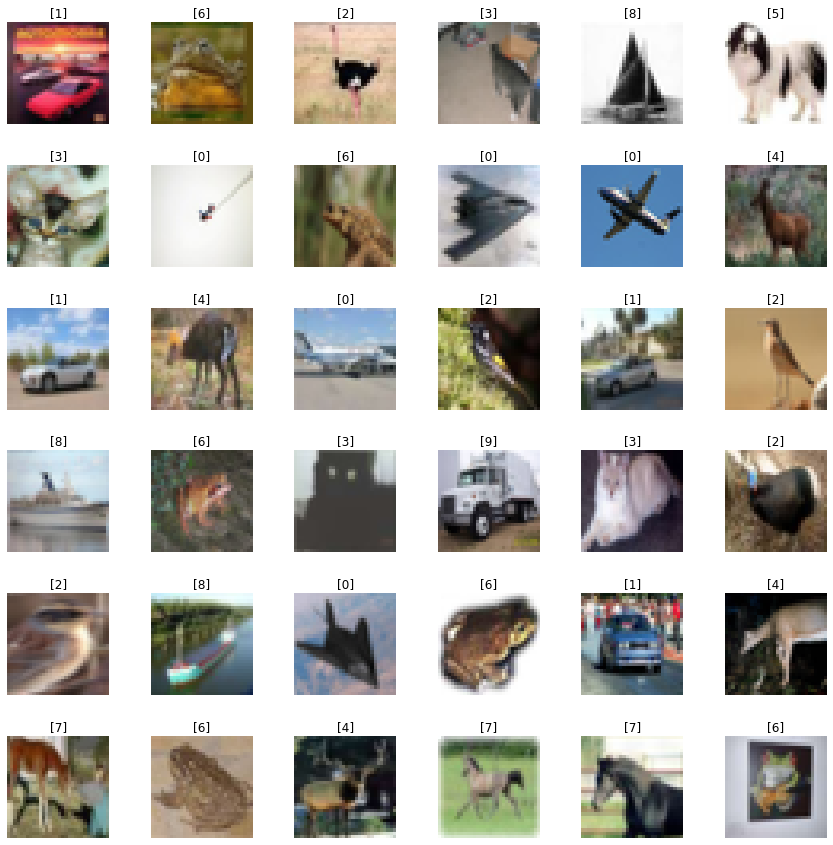

In [7]:
# first we're going to specify the length of the grid and the width of the grid.
W_grid = 6
L_grid = 6

# then let's create a subplots where in one figure, we can generate multiple plots.
fig, axes = plt.subplots(L_grid, W_grid, figsize=(15, 15))
axes = axes.ravel()

# then, let's obtain the length of our training data and assign it to variable.
n_training = len(X_train)

# then, create a for loop
for i in np.arange(0, L_grid * W_grid): # generate numbers that range between zero up until the length of the grid times the width of the grid, which is 6x6.
    index = np.random.randint(0, n_training) # every time we grab an index, pick a random number.
    axes[i].imshow(X_train[index]) # show the actual image of that index
    axes[i].set_title(y_train[index]) # set the title to be our corresponding label, which is y_train of index.
    axes[i].axis('off') # disable the axis

plt.subplots_adjust(hspace = 0.4) # adjust the spacing between the images to 0.4.


Now we have a nice grid that shows us the six images by six images. Also on the title we all the corresponding labels associated with it.
For example, the image in the top right most part has a label of 3 which if we verify in our list of classes, it refers to a cat.

Again, if we run the code block above, this will generate a random images again.

- **Plot a grid containing 100 images from the testing dataset and perform a sanity check on the data** 

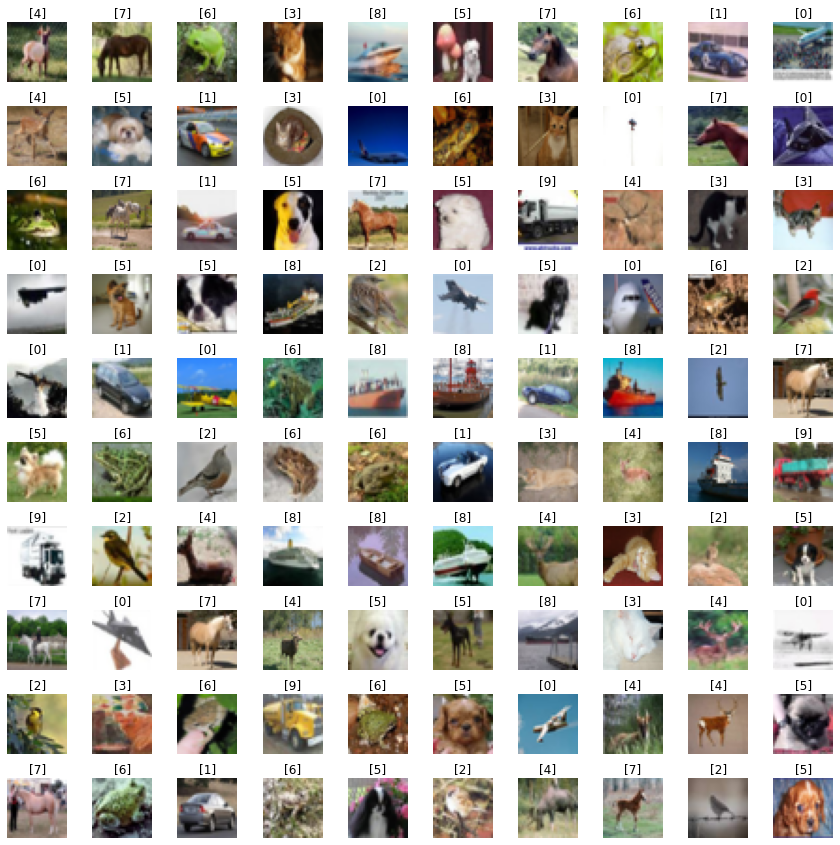

In [8]:
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize=(15, 15))
axes = axes.ravel()

n_testing = len(X_test)

for i in np.arange(0, L_grid * W_grid): 
    index = np.random.randint(0, n_testing) 
    axes[i].imshow(X_test[index]) 
    axes[i].set_title(y_test[index]) 
    axes[i].axis('off') 

plt.subplots_adjust(hspace = 0.4) 

### TASK #4: PREPARE THE DATA FOR TRAINING

In [9]:
# check length of the training data
n_training

50000

In [10]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

When we check our X_train data, we get all the different
values of the pixels. Whenever we represent any image,
as we know in our dataset it's a color scale image, we have
three channels. These are red(R), green(G) and blue(B). And each
of the values within these pixels could range anywhere
between 0 and 255. These are the bunch of numbers that
we're seeing above.


Zero indicates that this is a black pixel. And 255 indicates
that this is a white pixel. Anything in between basically
just these are the different variations of that colour.

In [11]:
# convert our train and test data into float32 format.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
# assign a variable for the number of classes we have in this dataset
number_class = 10

In [13]:
# let's check what is in y_train
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

What we have is bunch of integer numbers. When we train our deep neural network model, we will take our y_train and convert them in a categorical format using to_categorical function from keras.

In [14]:
# use to_categorical
# feed in the y_train
# specify how many categories/classes we have
# assign it to a variable

y_train = tf.keras.utils.to_categorical(y_train, number_class)

In [15]:
# let's check our y_train again
pd.get_option("display.max_rows")
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

Now we will see here that we have bunch of zeros and ones that represents each integer values from our y_train. For example, the last integer value we have from y_train was 1. After converting it to categorical format, it became [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.].

In [16]:
# To view all the rows of an array, you can enable the code below:
#with np.printoptions(threshold=np.inf):
#    print(y_train)

When we train our deep neural network model, we are going to have 10 outputs. Think of it as all these
10 outputs are going to generate probabilities. Any number
between zero and 1. The output that has the highest
probability will belong to the correct class.

In [17]:
# Let's do the same conversion to our test dataset

y_test = tf.keras.utils.to_categorical(y_test, number_class)

In [18]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

Next, we are going to normalize our images. 
Instead of allowing each pixel to range anywhere
between zero and 255, we're going to take our X_train and X_test, which is the actual values of the pixels, and divide them by 255.
That will allow all the pixels to range
between zero and one.

In [19]:
X_train = X_train/255
X_test = X_test/255

In [20]:
# Let's check our X_train again
# let's pull out the first row only
X_train[:1]

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

Now we have a bunch of number __ranging__ anywhere from 0 to 1.

In [21]:
# Let's check the shape
print('X_train size is still:', X_train.shape)

X_train size is still: (50000, 32, 32, 3)


Great! Our X_train is still of the same size, 50,000 images. Each image is still 32 pixels by 32 pixels by
three. The only difference is now they do not range
between zero and 255. Now they range only from zero to 1 because we divided x_train and x_test by 255.

In [22]:
# Let's get the element of 32x32x3
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

In [23]:
# now let's check the shape of our y_train
y_train.shape

(50000, 10)

### TASK #5: BUILD A DEEP NEURAL NETWORK MODEL USING KERAS

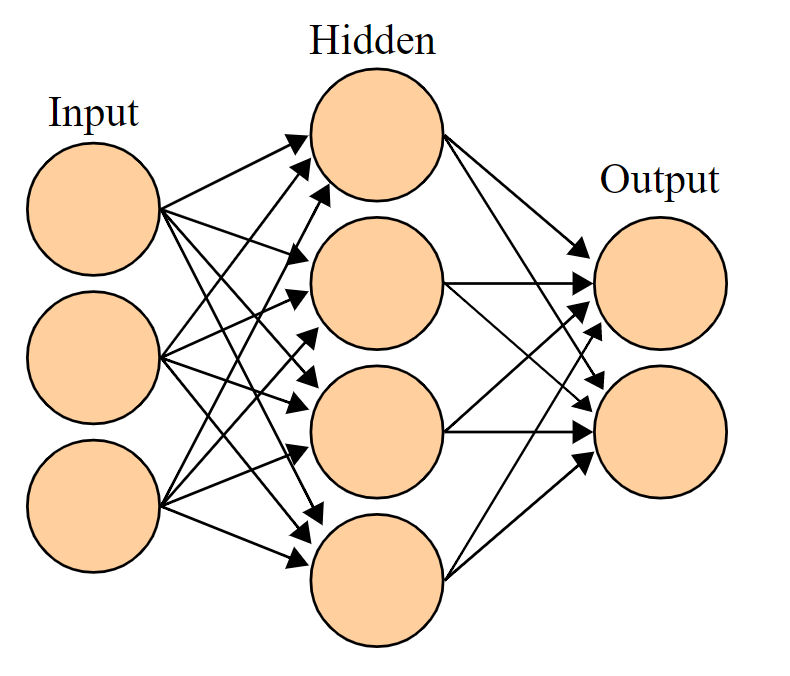

__Image Source:__ https://commons.wikimedia.org/wiki/File:Artificial_neural_network.svg

In [24]:
# instantiate our object using Sequential function from keras
cnn = tf.keras.Sequential()

# add the first layer
cnn.add(tf.keras.layers.Conv2D(32, # this refers to the number of filters.
                               (3,3), # this refers to the size of our filters.
                               activation = 'relu', # stands for rectified linear units; introduces non-linearity in our network and dramitcally improve network performance.
                               input_shape = (32, 32, 3))) # this refers to the size of the image. Sinply put 32 pixels by 32 pixels by 3.
# add additional layers
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
# add Maxpooling layer
cnn.add(tf.keras.layers.MaxPooling2D(2,2)) # this means we are reducing the size of our feature pmaps by adding/introducing this maxplooing layer
# add dropout layer
cnn.add(tf.keras.layers.Dropout(0.3)) # dropout is a regularization technique that is primarily used to improve the generalization ability of the network; this also means that we are dropping out a couple of neurons randomly.

# add an additional convolutional layer
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu')) # we dont need to specify the input shape here because, keras is smart, it can inherit the shape from the previous layers
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

# now let's flatten up our feature maps
cnn.add(tf.keras.layers.Flatten())

# now lets feed them into our dense fully connected artificial neural network
cnn.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

# add another dense layer with 1024 number of neurons
cnn.add(tf.keras.layers.Dense(1024, activation='relu'))

# Add another dense layer
# But with only 10 outputs because we only have 10 categories/classes that we're trying to classify all these images according to
# The activation will be softmax, which is anumber that could range between 0 and 1. 
# This is important because we wanted to generate different probabilities at all these different 10 neurons.
# The neuron with the highest probability that means it belongs to that specific class.
cnn.add(tf.keras.layers.Dense(10, activation='softmax')) # this is simply the output layer.

# Plot the summary of our cnn.
# This will plot also the number of trainable parameters.
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

Here we see the architecture of the brain that we designed.

Notice that in total, we have 2.7 million trainable parameters. The figure is kinda scary to to think about. It's like a massive network that we built with just like 15 lines of code which is really powerful.

### TASK #6: COMPILE AND FIT A DEEP NEURAL NETWORK MODEL

In [25]:
# set our optimizers
# specify the type of loss and metrics
# then apply the fit method on our cnn object passing along our X_trian and y_train, which is our input and output
# then train our model
# Since the model is quite a complex model, we will just trian our model only once just for one epoch.
# Epoch means one iteration or one run.
# This is when we feed all the training data to our model and update all the different weights once.
# Use RMSprop optimizer. This optimizers works really well in case of convolutional neural networks.

cnn.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), loss='categorical_crossentropy', # set this type of loss because we have more than 2 classes. If we only have 2 classes in the output, then we can use a binary crossentropy.
            metrics = ['accuracy']) # accuracy is the metric that we wanted to check.

In [26]:
# specify the number of epochs that we will have
# if we set it to 100, we may need a higher GPU because it will take a long time to iterate.
# let's use 1 for now.
epochs = 1

# creat a history variable equipped with our CNN object.
history = cnn.fit(X_train, y_train, batch_size=512, epochs = epochs)

98/98 [==============================] - 102s 1s/step - loss: 2.0861 - accuracy: 0.2217


In [27]:
# Now let's sve the model we created.
# Saving a model is like saving the intelligence that has been captured in all these different weights.
# When we save this model, we can import this afterwards and can as well deploy in
# the field and use it ibn practice.

# serialize model to JSON
model_json = cnn.to_json()
with open("model.json", "w") as json_file: # write our model
    json_file.write(model_json)            # ths contains the architecture of our model. Such as "How many layers do we have?", "How many max pooling layers?", Is the activation function for example, is relu or not?

# Store also the value of weights
# Serialize weights to HDF5
cnn.save_weights("model.h5")
# This is simply the actual values of the weights after the model is trained.
# So, after the model is trained after the last epoch, we can actually save the values of the weights.
# Then all we need to do to load that model is import the Jason, which is the architecture of the model,
# and we'd also wanted to import the values of weights.

print("Saved model to disk")

Saved model to disk


In [30]:
# load the created json and create model

from tensorflow.keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
cnn = model_from_json(loaded_model_json)
# Load weights into new model
cnn.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [31]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

The model we trained above is for 1 eopch only. Let's load a pre-trained model with 100 epochs, which we did not created here for the purpose of demonstration only.

In [32]:
from tensorflow.keras.models import model_from_json

json_file = open('Notebook/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
cnn = model_from_json(loaded_model_json)
# Load weights into new model
cnn.load_weights("Notebook/cifar10_trained_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [33]:
# let's check the summary
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

Please note this model has already been trained
for a large number of epochs than the one we created here.
Therefore it has a lot much higher accuracy compared to that model
that we just trained for only one epoch. Because here the accuracy only stands at .22 after we trained
it for one epoch only.
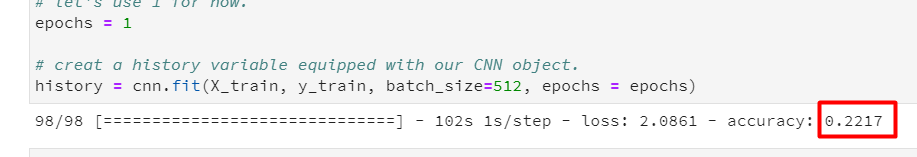

In [34]:
# let's check the shape of test data
X_test.shape

(10000, 32, 32, 3)

In [35]:
y_test.shape

(10000, 10)

Now let's compile our model.

In [36]:
# evaluate loaded model on test data
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), loss = 'categorical_crossentropy', metrics = ['accuracy'])
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X_test, y_test, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

### TASK #7: EVALUATE TRAINED MODEL

In [37]:
# Now let's use our model cnn to evaluate our test dataset
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 8s 22ms/step - loss: 0.6917 - accuracy: 0.7712
Test Accuracy: 0.7712000012397766


In the above, we see that we achieved a 77% accuracy rate.

In [38]:
# let's use our cnn object to predict using our test data
predicted_classes = cnn.predict(X_test)
predicted_classes

array([[7.52737833e-05, 1.47322495e-03, 9.80154146e-03, ...,
        4.67838865e-04, 2.21026014e-03, 5.45002287e-04],
       [5.11051156e-04, 1.43843191e-03, 2.32146231e-08, ...,
        5.75239079e-10, 9.97894704e-01, 1.55696966e-04],
       [3.95725388e-03, 1.18881948e-02, 1.06147956e-04, ...,
        7.60501962e-06, 9.74000692e-01, 9.97037534e-03],
       ...,
       [2.57442796e-08, 2.47221212e-08, 9.02541506e-05, ...,
        5.69793337e-04, 1.07969228e-07, 6.89600839e-08],
       [1.09294122e-02, 9.80217457e-01, 2.21437868e-03, ...,
        5.34708597e-05, 8.55869584e-05, 1.58489158e-03],
       [1.27286469e-07, 3.27514051e-08, 1.92149764e-05, ...,
        9.89549041e-01, 1.71644714e-07, 1.13096928e-06]], dtype=float32)

What we're getting here are probabilities that are going to be generated at the 10 outputs that we have in our model. If the model predictions are accurate, we should be getting numbers that are very small meaning they are almost zero. That means the model thinks that the probability of all these different classes are almost zero except for only one. And that will have the highest probability of all.

In [39]:
# let's use argmax
predicted_classes = predicted_classes.argmax(1)

In [40]:
predicted_classes

array([5, 8, 8, ..., 5, 1, 7], dtype=int64)

Here, we get five in first value. That means the first image belongs to class number five and these are the predictions only coming out from our model. This
could be right, could be wrong and that's what we should evaluate next.
The next image has class eight, the next one is class eight
and so on.

In [42]:
# Let's check our ground truth
y_test
# these data are what really happens in real life.
# These are actual labels.

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [43]:
# let's apply argmax to our y_test
y_test = y_test.argmax(1)

In [44]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

<AxesSubplot:>

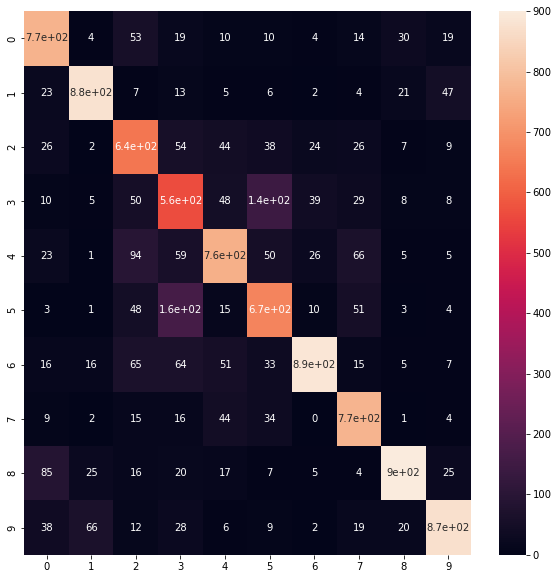

In [45]:
# let's compare the performance of our predicted and ground truth
# let's use confusion_matric function from sklearn
from sklearn.metrics import confusion_matrix

# let's also use heatmap from seaborn to visualize our matrix
import seaborn as sns

cm = confusion_matrix(predicted_classes, y_test)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

Our model prediction are on y-axis. Our ground truth are on x_axis. The diagonal values are the overall number of samples that have been correctly classified.

So whenever the model predictions match what happened in real life, that's a great thing. That means the model was accurate.

Any values below or above the diagonal line, these are where the model messed up and made the wrong predictions.

Examples of misclassified:  
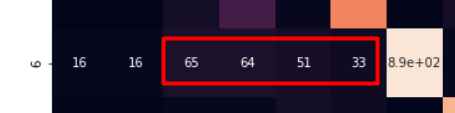

Now let's plot an image for our model predictions and ground truth.

In [ ]:
# CIFAR-10 has 10 Classes as follows: 
# 0. Airplanes
# 1. Cars 
# 2. Birds
# 3. Cats
# 4. Deer
# 5. Dogs
# 6. Frogs
# 7. Horses
# 8. Ships
# 9. Trucks

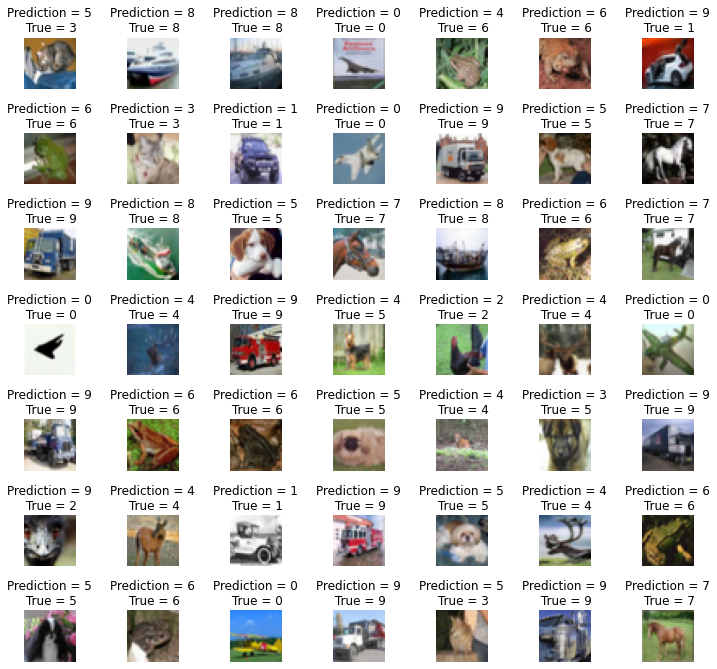

In [46]:
L = 7 # length
W = 7 # width
fig, axes = plt.subplots(L, W, figsize = (12, 12)) # specify the subplots
axes = axes.ravel()

for i in np.arange(0, L*W): # create a for loop from 0 up until the product of L and W
    axes[i].imshow(X_test[i]) # show the image 
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

Here we have all the different images of both predicted and ground truth. Please note that these images have never been seen by the model during training which is powerful.

Those that are of the same value for Prediction and True means the model accurately classfiied these images. While those that or of different values, means the model misclassifid these. There are few of these though.